# Embedding technique used to convert text to vectors(numerical)suitable i/p for both ML and DL model building

# Bidirectional LSTM is used for model building.

# As sentence length is high here we need Attention,transformers,BERT etc for a better model performance.Currently R&D going on.Still Bidirectional LSTM gives 91.85% accurecy which can be improved later with better models.

# 1.Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


import joblib

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

# 2.Importing the cleaned dataset

In [3]:
X=pd.read_csv('cleaned data fakenews')

In [4]:
y=pd.read_csv('cleaned data fakenews(y)target')

In [5]:
X.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,217,218,219
0,0,3225,3499,2464,4710,3526,1522,4710,4199,2704,...,530,2234,1634,2039,2920,3028,238,3840,4341,2122
1,1,3283,4537,3341,992,2912,3327,451,3630,2593,...,4861,3889,4035,2521,1977,1645,3347,2839,321,321
2,2,0,0,0,0,0,0,0,0,0,...,3593,1102,4453,4482,21,1373,4033,637,3749,4851
3,3,2415,2337,3667,2296,1081,3330,3630,3439,414,...,2978,3911,3689,3308,4710,2395,3623,2625,2608,4516
4,4,2435,2929,1021,1617,1204,3789,2669,4827,4927,...,2379,3430,3958,3689,3245,3583,4477,3459,2428,2741


In [6]:
X=X.drop('Unnamed: 0',axis=1)

In [7]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,3225,3499,2464,4710,3526,1522,4710,4199,2704,3483,...,530,2234,1634,2039,2920,3028,238,3840,4341,2122
1,3283,4537,3341,992,2912,3327,451,3630,2593,2839,...,4861,3889,4035,2521,1977,1645,3347,2839,321,321
2,0,0,0,0,0,0,0,0,0,0,...,3593,1102,4453,4482,21,1373,4033,637,3749,4851
3,2415,2337,3667,2296,1081,3330,3630,3439,414,136,...,2978,3911,3689,3308,4710,2395,3623,2625,2608,4516
4,2435,2929,1021,1617,1204,3789,2669,4827,4927,3471,...,2379,3430,3958,3689,3245,3583,4477,3459,2428,2741


In [8]:
y.head()

,Unnamed: 0,index,label
0,0,0,0
1,1,1,0
2,2,2,0
3,3,3,0
4,4,4,1


In [9]:
y=y.drop(['Unnamed: 0','index'],axis=1)

In [10]:
y.head()

,label
0,0
1,0
2,0
3,0
4,1


In [11]:
y=y[['label']]
X=X

In [13]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,3225,3499,2464,4710,3526,1522,4710,4199,2704,3483,...,530,2234,1634,2039,2920,3028,238,3840,4341,2122
1,3283,4537,3341,992,2912,3327,451,3630,2593,2839,...,4861,3889,4035,2521,1977,1645,3347,2839,321,321
2,0,0,0,0,0,0,0,0,0,0,...,3593,1102,4453,4482,21,1373,4033,637,3749,4851
3,2415,2337,3667,2296,1081,3330,3630,3439,414,136,...,2978,3911,3689,3308,4710,2395,3623,2625,2608,4516
4,2435,2929,1021,1617,1204,3789,2669,4827,4927,3471,...,2379,3430,3958,3689,3245,3583,4477,3459,2428,2741


In [14]:
y.head()

,label
0,0
1,0
2,0
3,0
4,1


# Minmax scaler(standard scaler gives negative value which gives error in MultnomialNB)

# Creating model with dropout layer for better performance of the model.

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [16]:
voc_size=5000
sent_length=220
embedding_vector_features=40#For DL-NN model only.Not required for ML model

model1=Sequential()#see word embedding video-39 & 40 ,Converting to required size mat
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 220, 40)           200000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
import numpy as np
X_final=np.array(X)
y_final=np.array(y['label'])

In [18]:
X_final

array([[3225, 3499, 2464, ..., 3840, 4341, 2122],
       [3283, 4537, 3341, ..., 2839,  321,  321],
       [   0,    0,    0, ...,  637, 3749, 4851],
       ...,
       [1790, 4566, 1455, ..., 4788, 1102,  553],
       [4932, 3302, 2947, ...,  307, 3026, 1134],
       [   0,    0,    0, ..., 4920,  636, 4659]], dtype=int64)

In [19]:
y_final

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# train_test_split

In [20]:
from sklearn.model_selection import train_test_split
                                                      
X_train, X_test, y_train, y_test = train_test_split( X_final, y_final, test_size = 0.20, random_state = 0,stratify=y_final)

In [21]:
X_train.shape, y_train.shape

((14628, 220), (14628,))

In [22]:
X_final.shape,y_final.shape

((18285, 220), (18285,))

# Model Training

In [23]:
### Finally Training with model1(dropout layer added)
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
229/229 [==============================] - 180s 785ms/step - loss: 0.3356 - accuracy: 0.8479 - val_loss: 0.2153 - val_accuracy: 0.9095
Epoch 2/10
229/229 [==============================] - 175s 765ms/step - loss: 0.1536 - accuracy: 0.9457 - val_loss: 0.2035 - val_accuracy: 0.9204
Epoch 3/10
229/229 [==============================] - 179s 784ms/step - loss: 0.1120 - accuracy: 0.9621 - val_loss: 0.2196 - val_accuracy: 0.9155
Epoch 4/10
229/229 [==============================] - 181s 790ms/step - loss: 0.0896 - accuracy: 0.9701 - val_loss: 0.2381 - val_accuracy: 0.9204
Epoch 5/10
229/229 [==============================] - 184s 804ms/step - loss: 0.0971 - accuracy: 0.9664 - val_loss: 0.2432 - val_accuracy: 0.9119
Epoch 6/10
229/229 [==============================] - 198s 866ms/step - loss: 0.0572 - accuracy: 0.9817 - val_loss: 0.2677 - val_accuracy: 0.9182
Epoch 7/10
229/229 [==============================] - 196s 857ms/step - loss: 0.0436 - accuracy: 0.9856 - val_loss: 0.3075 -

# Performance Metrics And Accuracy

# Accuracy score

In [24]:
y_pred1=model1.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9185124418922614

# Classification report

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2072
           1       0.92      0.89      0.90      1585

    accuracy                           0.92      3657
   macro avg       0.92      0.92      0.92      3657
weighted avg       0.92      0.92      0.92      3657



# Confusion matrix visualizations

In [26]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test,y_pred1)

array([[1945,  127],
       [ 171, 1414]], dtype=int64)

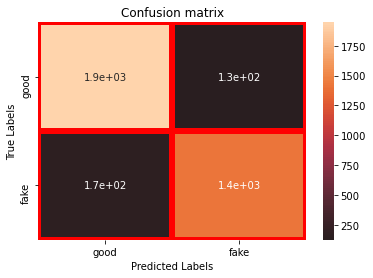

In [27]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred1)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['good','fake'])
ax.yaxis.set_ticklabels(['good','fake'])
plt.show()